## Space Race Visualization

<center><img src="https://revolutionized.com/wp-content/uploads/sites/5/2022/05/rocket-launch-at-sunset.jpg" height=400></center>

In [ ]:
!pip install iso3166

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import iso3166 as iso
from iso3166 import countries
from datetime import datetime, timedelta

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Space-Race-Visualization/data/mission_launches.csv")
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
data.drop(['Unnamed: 0', 'Unnamed: 0.1'], inplace=True, axis=1) # Remove columns containing junk data
data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [ ]:
data.shape, data.size

((4324, 7), 30268)

In [ ]:
data.isna()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4319,False,False,False,False,False,True,False
4320,False,False,False,False,False,True,False
4321,False,False,False,False,False,True,False
4322,False,False,False,False,False,True,False


<Axes: >

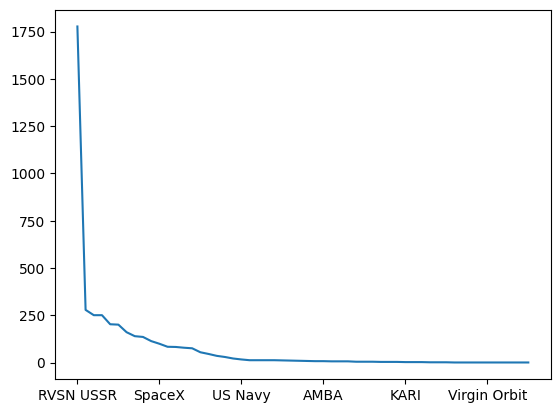

In [ ]:
data["Organisation"].value_counts().plot()

<Axes: >

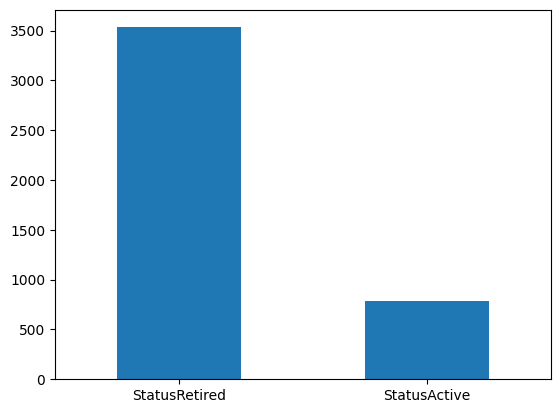

In [ ]:
data["Rocket_Status"].value_counts().plot(kind="bar", rot=0)

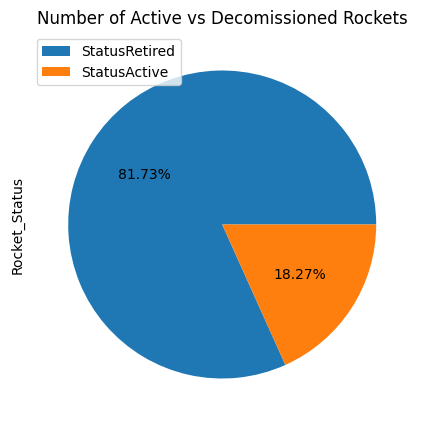

In [ ]:
data['Rocket_Status'].value_counts().plot(
    kind='pie',
    title='Number of Active vs Decomissioned Rockets',
    figsize = (5,5),
    autopct = '%1.2f%%',
    labels = None
)

plt.legend(labels = data['Rocket_Status'].value_counts().index)
plt.show()

In [ ]:
data["Mission_Status"].value_counts()

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [ ]:
data.groupby("Mission_Status").agg({"Mission_Status":pd.Series.count})

,Mission_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3879


In [ ]:
px.histogram(data.sort_values(by=["Organisation", "Price"], ascending=[False, False]), x="Price", nbins=10)

In [ ]:
data['Price'] = data['Price'].apply(lambda x:str(x).replace(',','')).astype('float64') # convert to float
data['Price'].isna().sum() # the number of nan values persists

3360

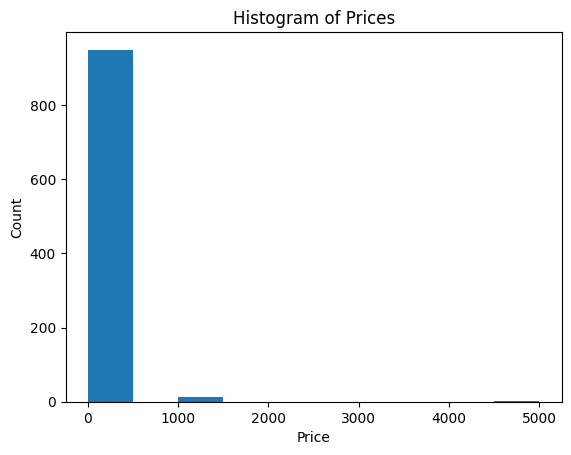

In [ ]:
sorted_data = data.sort_values(by=["Organisation", "Price"], ascending=[False, False])

fig, ax = plt.subplots()
ax.hist(x=sorted_data["Price"], bins=10)

ax.set_xlabel("Price")
ax.set_ylabel("Count")
ax.set_title("Histogram of Prices")

plt.show();

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], utc=True) # convert Date column into datetime
data['Date']

0      2020-08-07 05:12:00+00:00
1      2020-08-06 04:01:00+00:00
2      2020-08-04 23:57:00+00:00
3      2020-07-30 21:25:00+00:00
4      2020-07-30 11:50:00+00:00
                  ...           
4319   1958-02-05 07:33:00+00:00
4320   1958-02-01 03:48:00+00:00
4321   1957-12-06 16:44:00+00:00
4322   1957-11-03 02:30:00+00:00
4323   1957-10-04 19:28:00+00:00
Name: Date, Length: 4324, dtype: datetime64[ns, UTC]

In [ ]:
data.describe()

,Price
count,964.000000
mean,153.792199
std,288.450732
min,5.300000
25%,40.000000
50%,62.000000
75%,164.000000
max,5000.000000


In [ ]:
launches_per_company = data['Organisation'].value_counts()
launches_per_company

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


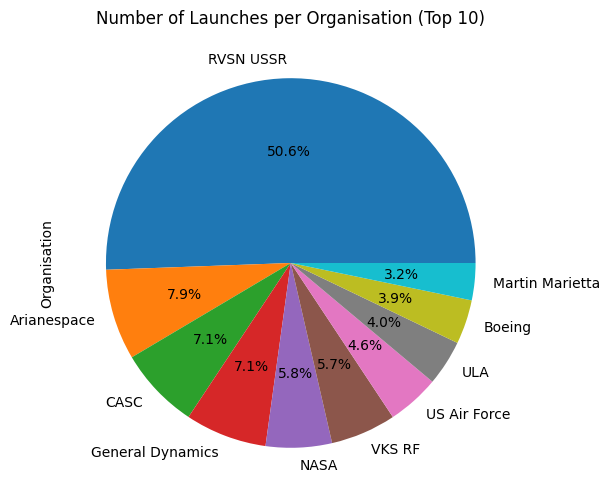

In [ ]:
launches_per_company[:10].plot(
    kind='pie',
    title='Number of Launches per Organisation (Top 10)',
    figsize=(6,6),
    autopct='%1.1f%%'
)
plt.show()

In [ ]:
mission_status = data['Mission_Status'].value_counts()
mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

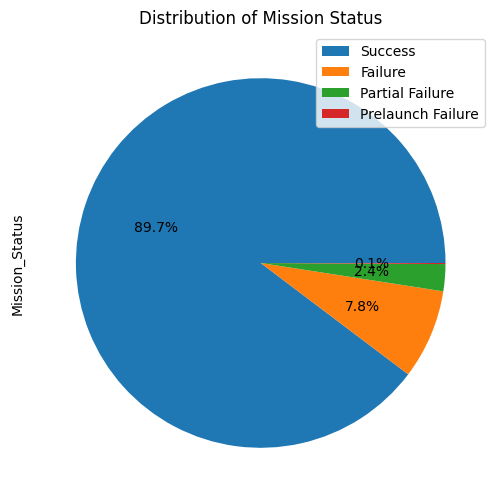

In [ ]:
mission_status.plot(
    kind='pie',
    figsize=(6, 6),
    autopct='%1.1f%%',
    title = 'Distribution of Mission Status',
    labels=None
)

plt.legend(labels=mission_status.index)
plt.show()

In [ ]:
# Get Country
data['Country'] = data['Location'].apply(lambda x: x.split(',')[-1].strip())
data['Country'].value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

In [ ]:
# Replace some locations with its countries according to the current ISO3166
data['Country'].replace(
    {
        'Russia':'Russian Federation',
        'Iran':'Iran, Islamic Republic of',
        'New Mexico':'USA',
        'Barents Sea':'Russian Federation',
        'Gran Canaria':'USA',
        'Yellow Sea':'China',
        'Shahrud Missile Test Site':'Iran, Islamic Republic of',
        'Pacific Missile Range Facility':'USA',
        'North Korea':"Korea, Democratic People's Republic of",
        'Pacific Ocean':'Kiribati',
        'South Korea':'Korea, Republic of'
    },
    inplace=True
)
data['Country'] = data['Country'].apply(lambda x: countries.get(x).alpha3)
data['Country'].value_counts()

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: Country, dtype: int64

In [ ]:
launches_per_country = data['Country'].value_counts()
launches_per_country

RUS    1398
USA    1351
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
KIR      36
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: Country, dtype: int64

In [ ]:
px.choropleth(
    launches_per_country,
    locations=launches_per_country.index,
    color=launches_per_country,
    title = 'Number of Launches by Country'
)

In [ ]:
failures_per_country = data[data['Mission_Status'] == 'Failure']['Country'].value_counts()
failures_per_country

USA    129
KAZ     72
RUS     63
CHN     19
FRA     13
JPN     10
IRN      8
IND      8
KIR      3
PRK      3
AUS      3
NZL      2
KOR      2
ISR      2
BRA      2
Name: Country, dtype: int64

In [ ]:
px.choropleth(
    failures_per_country,
    locations=failures_per_country.index,
    color=failures_per_country,
    title = 'Number of Failures by Country'
)

In [ ]:
px.sunburst(data, path=['Country', 'Organisation', 'Mission_Status'], title='Mission Status by Country and Organization')

In [ ]:
# Group Total Money Spent by Organization
money_spent_by_organization = data.groupby('Organisation')['Price'].sum()
money_spent_by_organization[money_spent_by_organization!=0]

Organisation
Arianespace        16345.00
Boeing              1241.00
CASC                6340.26
EER                   20.00
ESA                   37.00
Eurockot             543.40
ExPace                28.30
ILS                 1320.00
ISRO                2177.00
JAXA                 168.00
Kosmotras            638.00
Lockheed             280.00
MHI                 3532.50
Martin Marietta      721.40
NASA               76280.00
Northrop            3930.00
RVSN USSR          10000.00
Rocket Lab            97.50
Roscosmos           1187.50
Sandia                15.00
SpaceX              5444.00
ULA                14798.00
US Air Force        1550.92
VKS RF              1548.90
Virgin Orbit          12.00
Name: Price, dtype: float64

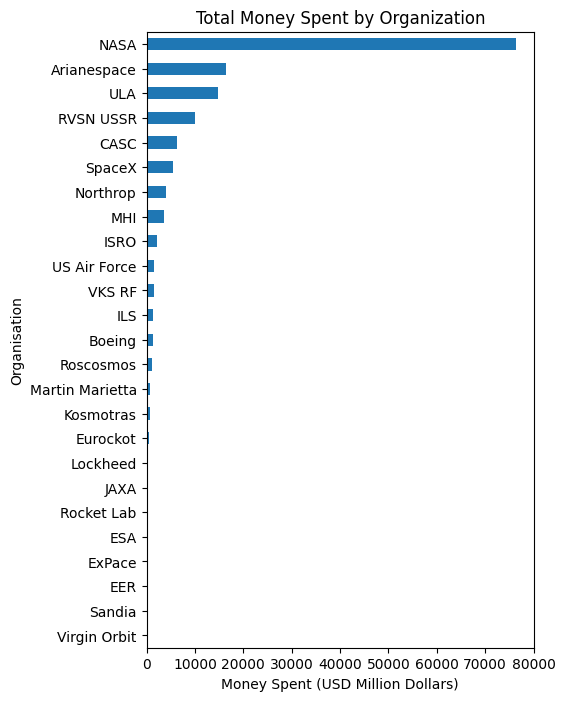

In [ ]:
# I removed the NaN values (It seems many organization chose to not disclose their expenses)
money_spent_by_organization[money_spent_by_organization!=0].sort_values().plot(
    kind='barh',
    title = 'Total Money Spent by Organization',
    figsize=(5, 8)
)

plt.xlabel('Money Spent (USD Million Dollars)')
plt.show()

In [ ]:
avg_money_spent = data.groupby('Organisation').agg({'Price':np.mean})
avg_money_spent.dropna()

,Price
Organisation,
Arianespace,170.260417
Boeing,177.285714
CASC,40.128228
EER,20.000000
ESA,37.000000
Eurockot,41.800000
ExPace,28.300000
ILS,101.538462
ISRO,32.492537


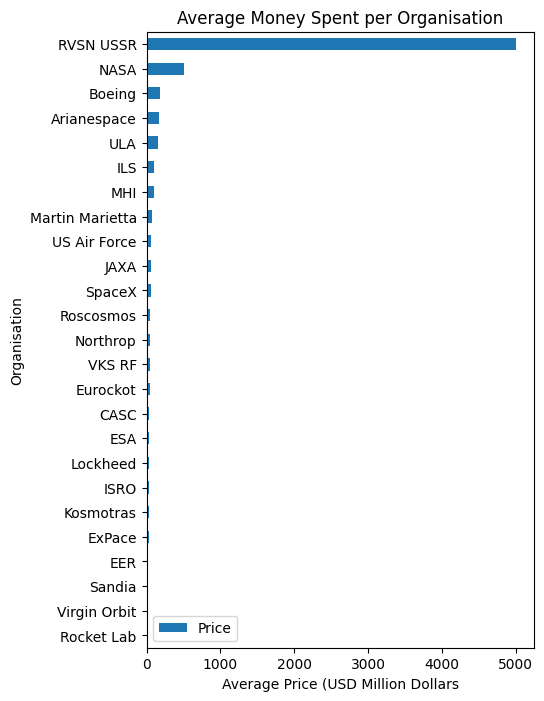

In [ ]:
avg_money_spent.dropna().sort_values('Price').plot(
    kind='barh',
    figsize=(5, 8),
    title='Average Money Spent per Organisation',
)

plt.xlabel('Average Price (USD Million Dollars')
plt.show()

In [ ]:
data['Year'] = data['Date'].dt.year
launches_per_year = data.groupby('Year')['Detail'].count()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: Detail, Length: 64, dtype: int64

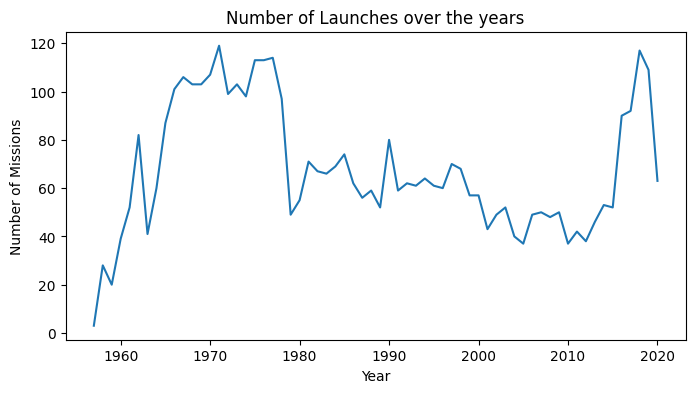

In [ ]:
launches_per_year.plot(
    title='Number of Launches over the years',
    figsize = (8, 4)
)

plt.ylabel('Number of Missions')
plt.show()

In [ ]:
launches_per_month = data.groupby(data['Date'].dt.month)['Detail'].count()
launches_per_month

Date
1     268
2     336
3     353
4     383
5     326
6     402
7     351
8     373
9     365
10    381
11    336
12    450
Name: Detail, dtype: int64

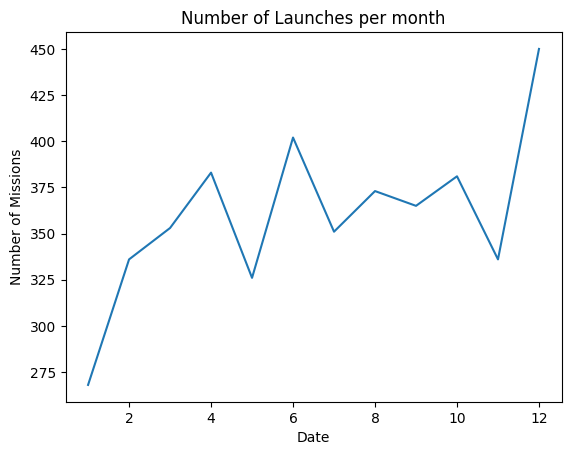

In [ ]:
plt.figsize = (8, 4)
launches_per_month.plot(title = 'Number of Launches per month')

plt.ylabel('Number of Missions')
plt.show()

In [ ]:
price_over_time = data.dropna().groupby('Date')['Price'].mean()
price_over_time

Date
1964-09-01 15:00:00+00:00     63.23
1964-12-10 16:52:00+00:00     63.23
1965-02-11 15:19:00+00:00     63.23
1965-05-06 15:00:00+00:00     63.23
1966-07-29 18:43:00+00:00     59.00
                              ...  
2020-07-25 03:13:00+00:00     64.68
2020-07-30 11:50:00+00:00    145.00
2020-07-30 21:25:00+00:00     65.00
2020-08-06 04:01:00+00:00     29.75
2020-08-07 05:12:00+00:00     50.00
Name: Price, Length: 963, dtype: float64

<Axes: title={'center': 'Average Launch Price over Time'}, xlabel='Date'>

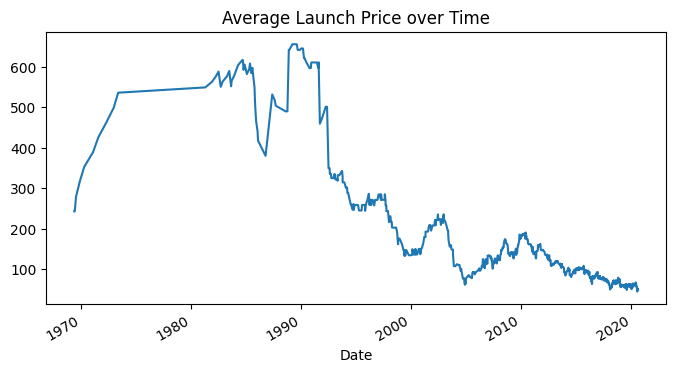

In [ ]:
# Since the results are way too complicated, I used a rolling average to visualize the average launch price over time
price_over_time.rolling(30).mean().plot(
    figsize = (8, 4),
    title = 'Average Launch Price over Time'
)

In [ ]:
top_10_organisations = data['Organisation'].value_counts().sort_values(ascending=False)[:10].index.tolist()
top_10_organisations

['RVSN USSR',
 'Arianespace',
 'CASC',
 'General Dynamics',
 'NASA',
 'VKS RF',
 'US Air Force',
 'ULA',
 'Boeing',
 'Martin Marietta']

In [ ]:
launches_by_top_10 = data[data['Organisation'].isin(top_10_organisations)].groupby(['Year','Organisation'])['Detail'].count().unstack(level=1)
launches_by_top_10.fillna(0, inplace=True)
launches_by_top_10

Organisation,Arianespace,Boeing,CASC,General Dynamics,Martin Marietta,NASA,RVSN USSR,ULA,US Air Force,VKS RF
Year,,,,,,,,,,
1957,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1958,0.0,0.0,0.0,0.0,0.0,2.0,5.0,0.0,2.0,0.0
1959,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.0,10.0,0.0
1960,0.0,0.0,0.0,5.0,0.0,4.0,9.0,0.0,21.0,0.0
1961,0.0,0.0,0.0,8.0,0.0,12.0,9.0,0.0,23.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2016,11.0,0.0,22.0,0.0,0.0,0.0,0.0,12.0,0.0,4.0
2017,11.0,0.0,16.0,0.0,0.0,0.0,0.0,8.0,0.0,6.0
2018,11.0,0.0,37.0,0.0,0.0,0.0,0.0,8.0,0.0,5.0


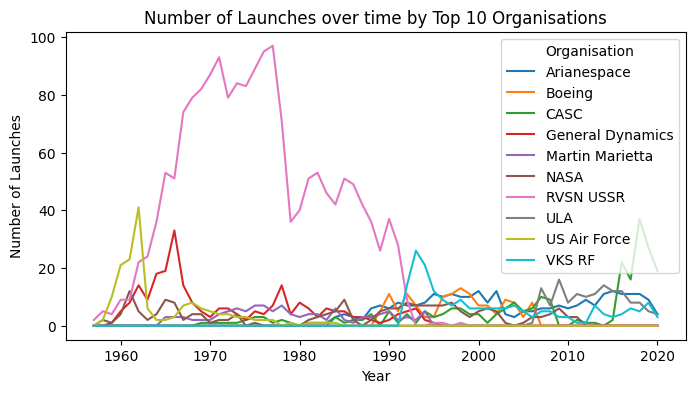

In [ ]:
# I plot it based on year because if I plot it by date it will create a weirdly pointless visualization
launches_by_top_10.plot(
    figsize=(8, 4),
    title = 'Number of Launches over time by Top 10 Organisations',
)

plt.ylabel('Number of Launches')
plt.show()

# USSR vs. USA (Cold War)

In [ ]:
cold_war = data[data['Year']<=1991].sort_values('Year').reset_index(drop=True)

In [ ]:
cold_war.shape

(2607, 9)

In [ ]:
cold_war.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,KAZ,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,KAZ,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958
4,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958


In [ ]:
for country in cold_war['Country'].drop_duplicates():
  print(countries.get(country))

Country(name='Kazakhstan', alpha2='KZ', alpha3='KAZ', numeric='398', apolitical_name='Kazakhstan')
Country(name='United States of America', alpha2='US', alpha3='USA', numeric='840', apolitical_name='United States of America')
Country(name='Russian Federation', alpha2='RU', alpha3='RUS', numeric='643', apolitical_name='Russian Federation')
Country(name='France', alpha2='FR', alpha3='FRA', numeric='250', apolitical_name='France')
Country(name='Japan', alpha2='JP', alpha3='JPN', numeric='392', apolitical_name='Japan')
Country(name='Australia', alpha2='AU', alpha3='AUS', numeric='036', apolitical_name='Australia')
Country(name='Kenya', alpha2='KE', alpha3='KEN', numeric='404', apolitical_name='Kenya')
Country(name='China', alpha2='CN', alpha3='CHN', numeric='156', apolitical_name='China')
Country(name='India', alpha2='IN', alpha3='IND', numeric='356', apolitical_name='India')
Country(name='Israel', alpha2='IL', alpha3='ISR', numeric='376', apolitical_name='Israel')


In [ ]:
# Replace Kazakhstan with Russian Federation, since at that time Kazakhstan is part of the Soviet Republic
cold_war['Country'].replace(
    {'KAZ':'RUS'},
    inplace=True
)
cold_war['Country'].value_counts()

RUS    1770
USA     662
FRA      61
JPN      52
CHN      38
KEN       9
IND       7
AUS       6
ISR       2
Name: Country, dtype: int64

In [ ]:
ussr_vs_usa = cold_war[cold_war['Country'].isin(['RUS','USA'])]
ussr_vs_usa

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,RUS,1957
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958
4,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958
...,...,...,...,...,...,...,...,...,...
2601,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-04 09:00:00+00:00,Tsyklon-3 | Okean 3,StatusRetired,NaN,Success,RUS,1991
2602,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1991-06-05 13:24:00+00:00,Space Shuttle Columbia | STS-40,StatusRetired,450.0,Success,USA,1991
2603,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1991-06-11 05:42:00+00:00,Cosmos-3M (11K65M) | Cosmos 2150,StatusRetired,NaN,Success,RUS,1991
2604,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-06-13 15:41:00+00:00,Tsyklon-3 | Cosmos 2151,StatusRetired,NaN,Success,RUS,1991


In [ ]:
px.pie(
    title = 'Total Number of Launches (USSR vs USA)',
    values = ussr_vs_usa['Country'].value_counts(),
    names = ussr_vs_usa['Country'].value_counts().index,
)

In [ ]:
cold_war_launch_by_year = ussr_vs_usa.groupby(['Year','Country'])['Mission_Status'].count().unstack(level=1)
cold_war_launch_by_year

Country,RUS,USA
Year,,
1957,2,1
1958,5,23
1959,4,16
1960,9,30
1961,9,43
1962,22,60
1963,24,17
1964,36,24
1965,53,33


<Axes: title={'center': 'Total Launches by Year (USSR vs USA)'}, xlabel='Year'>

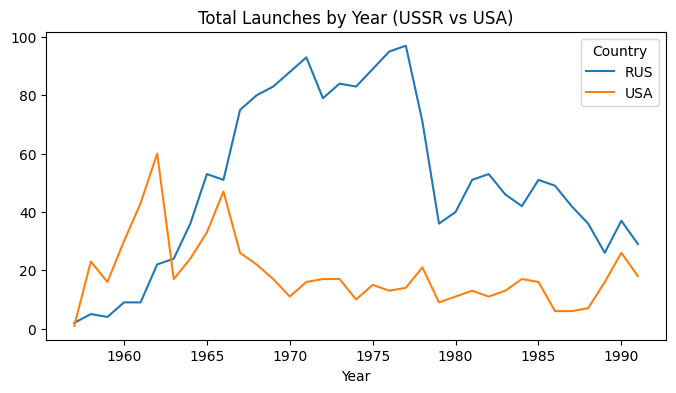

In [ ]:
cold_war_launch_by_year.plot(
    figsize = (8,4),
    title = 'Total Launches by Year (USSR vs USA)'
)

In [ ]:
cold_war_mission_failures_by_year = ussr_vs_usa[ussr_vs_usa['Mission_Status']!='Success'].groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
cold_war_mission_failures_by_year.fillna(0, inplace=True)
cold_war_mission_failures_by_year

Country,RUS,USA
Year,,
1957,0.0,1.0
1958,4.0,18.0
1959,2.0,10.0
1960,6.0,14.0
1961,4.0,16.0
1962,7.0,10.0
1963,8.0,4.0
1964,7.0,5.0
1965,6.0,7.0


<Axes: title={'center': 'Total Mission Failures by Year (USSR vs USA)'}, xlabel='Year'>

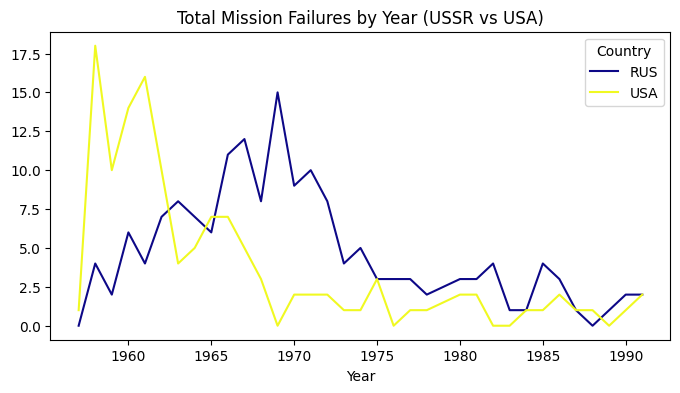

In [ ]:
cold_war_mission_failures_by_year.plot(
    figsize = (8, 4),
    title = 'Total Mission Failures by Year (USSR vs USA)',
    colormap='plasma'
)

In [ ]:
# Failure Percentage = number of unsuccessful missions / number of missions * 100
cold_war_failpct_by_year = cold_war_mission_failures_by_year/cold_war_launch_by_year * 100
cold_war_failpct_by_year.fillna(0, inplace=True)
cold_war_failpct_by_year

Country,RUS,USA
Year,,
1957,0.000000,100.000000
1958,80.000000,78.260870
1959,50.000000,62.500000
1960,66.666667,46.666667
1961,44.444444,37.209302
1962,31.818182,16.666667
1963,33.333333,23.529412
1964,19.444444,20.833333
1965,11.320755,21.212121


<Axes: title={'center': 'Mission Failure Percentage by Year (USSR vs USA)'}, xlabel='Year'>

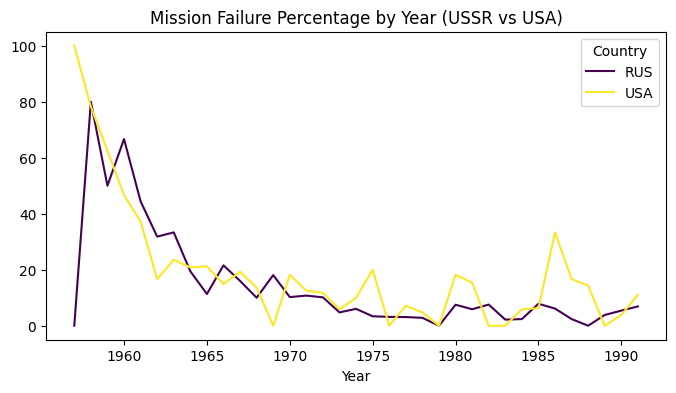

In [ ]:
cold_war_failpct_by_year.plot(
    figsize = (8,4),
    title = 'Mission Failure Percentage by Year (USSR vs USA)',
    colormap='viridis'
)

In [ ]:
launches_by_country_per_year = data.groupby(['Year', 'Country'])['Mission_Status'].count().unstack(level=1)
launches_by_country_per_year.fillna(0, inplace=True)
launches_by_country_per_year

Country,AUS,BRA,CHN,FRA,IND,IRN,ISR,JPN,KAZ,KEN,KIR,KOR,NZL,PRK,RUS,USA
Year,,,,,,,,,,,,,,,,
1957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
1959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,2.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.0,0.0,22.0,11.0,7.0,0.0,1.0,4.0,11.0,0.0,0.0,0.0,0.0,1.0,6.0,27.0
2017,0.0,0.0,18.0,11.0,5.0,1.0,0.0,7.0,13.0,0.0,0.0,0.0,1.0,0.0,6.0,30.0
2018,0.0,0.0,39.0,11.0,7.0,0.0,0.0,6.0,9.0,0.0,0.0,0.0,3.0,0.0,8.0,34.0


<Axes: title={'center': 'Number of Launches by Country over the Years'}, xlabel='Year'>

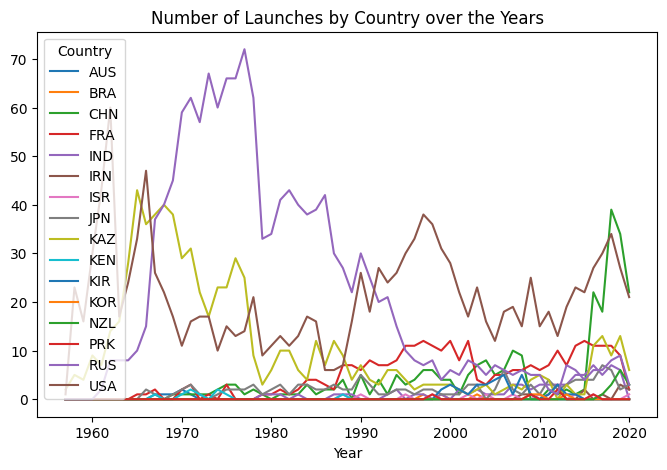

In [ ]:
launches_by_country_per_year.plot(
    title = 'Number of Launches by Country over the Years',
    figsize = (8,5),
)

In [ ]:
launches_by_organisation_per_year = data.groupby(['Year', 'Organisation'])['Mission_Status'].count().unstack(level=1)
launches_by_organisation_per_year.fillna(0, inplace=True)
launches_by_organisation_per_year

Organisation,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,Blue Origin,Boeing,CASC,CASIC,CECLES,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
Year,,,,,,,,,,,,,,,,,,,,,
1957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1958,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0
1959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
1961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,0.0,0.0,0.0,11.0,0.0,4.0,0.0,22.0,0.0,0.0,...,9.0,0.0,12.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2017,0.0,0.0,0.0,11.0,0.0,1.0,0.0,16.0,1.0,0.0,...,18.0,0.0,8.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0
2018,0.0,0.0,0.0,11.0,0.0,2.0,0.0,37.0,0.0,0.0,...,21.0,0.0,8.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


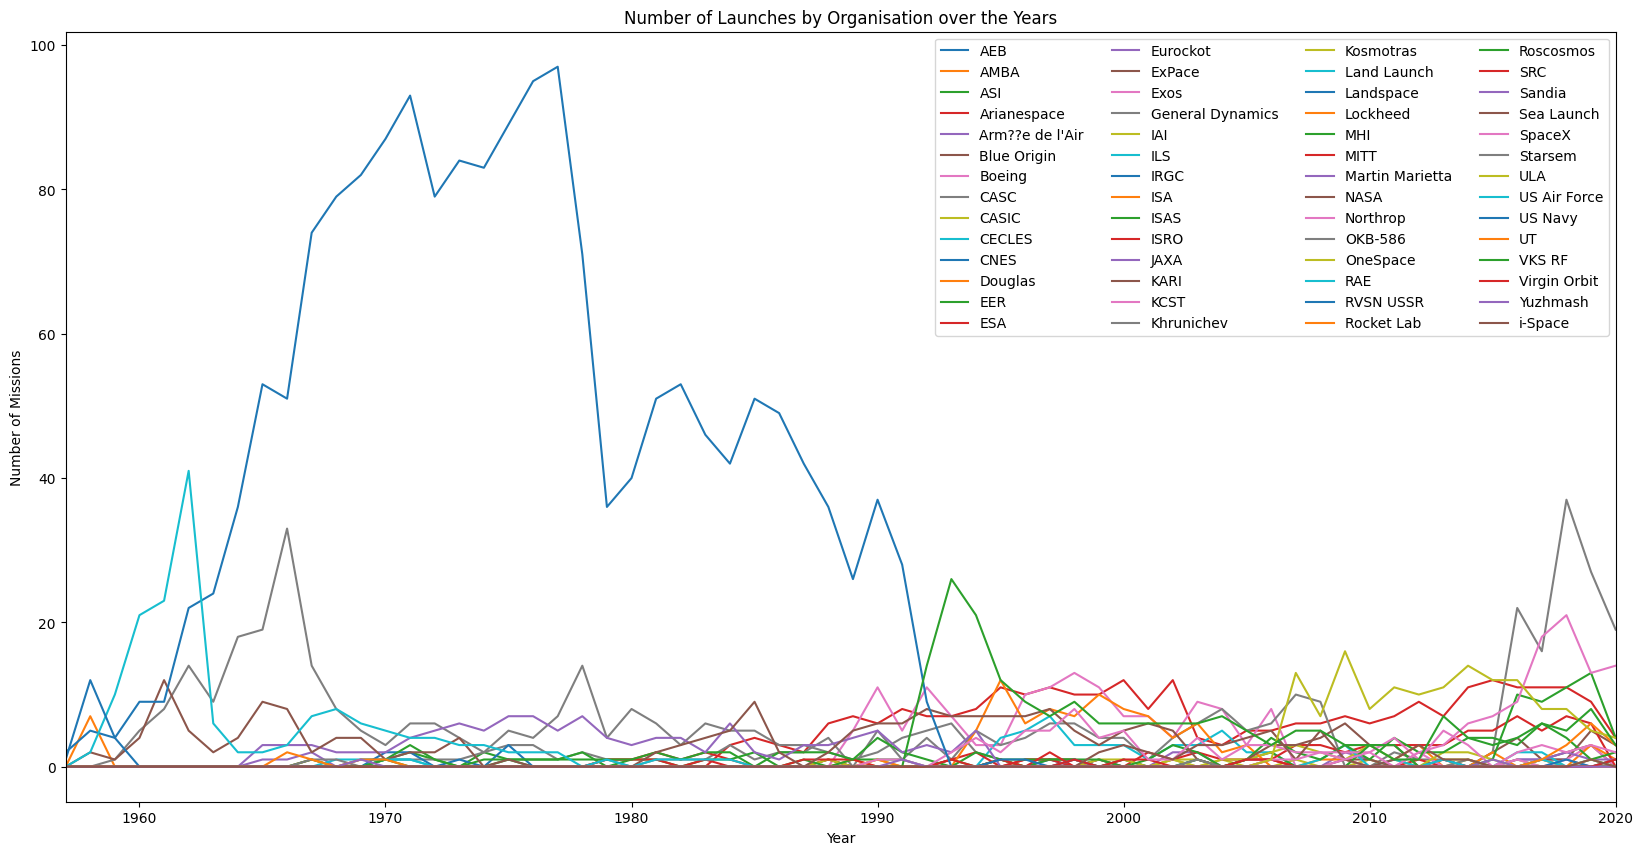

In [ ]:
launches_by_organisation_per_year.plot(
    title = 'Number of Launches by Organisation over the Years',
    figsize = (20, 10),
)

plt.ylabel('Number of Missions')
plt.xlim(1957, 2020)
plt.legend(loc="upper right", ncol=4)
plt.show()

In [ ]:
data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,CHN,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,KAZ,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,2020


In [ ]:
!pip freeze > requirements.txt